mlp

In [62]:
import os
import numpy as np
from skimage import io, transform, color
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Constants
image_size = (128, 128)
num_classes = 2
batch_size = 32
epochs = 500
learning_rate = 0.01

# Load and preprocess the image dataset
def load_dataset(data_dir):
    X = []
    y = []
    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        for image_file in os.listdir(class_dir):
            if image_file.endswith(".JPG"):
                img = io.imread(os.path.join(class_dir, image_file))
                img = transform.resize(img, image_size)
                img = color.rgb2gray(img)
                X.append(img)
                y.append(class_name)

    X = np.array(X)
    y = np.array(y)

    X = X / 255.0

    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    return X, y

# Specify the directory where your dataset is located
data_dir = r"C:\Users\HAI\Desktop\project\New folder"
X, y = load_dataset(data_dir)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Augmentation
augmented_X = []
augmented_y = []
for i in range(len(X_train)):
    augmented_X.append(X_train[i])
    augmented_y.append(y_train[i])
    augmented_X.append(np.rot90(X_train[i]))
    augmented_y.append(y_train[i])
    augmented_X.append(np.fliplr(X_train[i]))
    augmented_y.append(y_train[i])

augmented_X = np.array(augmented_X)
augmented_y = np.array(augmented_y)



In [72]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(image_size[0], image_size[1], 1)),
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(num_classes, activation='softmax')
])

optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
# Train the model
history = model.fit(augmented_X, augmented_y, epochs=300, validation_split=0.2)

Epoch 1/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5757 - loss: 0.6831 - val_accuracy: 0.6287 - val_loss: 0.6584
Epoch 2/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6947 - loss: 0.6010 - val_accuracy: 0.6138 - val_loss: 0.7553
Epoch 3/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6887 - loss: 0.5948 - val_accuracy: 0.6563 - val_loss: 0.6241
Epoch 4/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7439 - loss: 0.5251 - val_accuracy: 0.7299 - val_loss: 0.5419
Epoch 5/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7684 - loss: 0.4974 - val_accuracy: 0.6368 - val_loss: 0.6332
Epoch 6/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7761 - loss: 0.4625 - val_accuracy: 0.8138 - val_loss: 0.4582
Epoch 7/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8186 - loss: 0.4169 - val_accuracy: 0.7655 - val_loss: 0.4754
Epoch 8/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8267 - loss: 0.4023 - 

109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9452 - loss: 0.1424 - val_accuracy: 0.8701 - val_loss: 0.3558
Epoch 51/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9356 - loss: 0.1717 - val_accuracy: 0.8632 - val_loss: 0.3879
Epoch 52/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9260 - loss: 0.1826 - val_accuracy: 0.8609 - val_loss: 0.3836
Epoch 53/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9446 - loss: 0.1432 - val_accuracy: 0.8598 - val_loss: 0.3621
Epoch 54/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9398 - loss: 0.1473 - val_accuracy: 0.8437 - val_loss: 0.4148
Epoch 55/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9142 - loss: 0.2157 - val_accuracy: 0.8598 - val_loss: 0.3882
Epoch 56/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9484 - loss: 0.1354 - val_accuracy: 0.8207 - val_loss: 0.5174
Epoch 57/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9332 - loss: 0.1634 - val_a

109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9795 - loss: 0.0632 - val_accuracy: 0.8586 - val_loss: 0.5040
Epoch 100/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9722 - loss: 0.0731 - val_accuracy: 0.8598 - val_loss: 0.4789
Epoch 101/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9783 - loss: 0.0637 - val_accuracy: 0.8506 - val_loss: 0.5253
Epoch 102/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9522 - loss: 0.1167 - val_accuracy: 0.8414 - val_loss: 0.5617
Epoch 103/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9613 - loss: 0.1002 - val_accuracy: 0.8609 - val_loss: 0.4821
Epoch 104/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9821 - loss: 0.0576 - val_accuracy: 0.8598 - val_loss: 0.4861
Epoch 105/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9748 - loss: 0.0759 - val_accuracy: 0.8540 - val_loss: 0.5218
Epoch 106/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9710 - loss: 0.0836 

109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9522 - loss: 0.1152 - val_accuracy: 0.8310 - val_loss: 0.5775
Epoch 149/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9450 - loss: 0.1404 - val_accuracy: 0.8391 - val_loss: 0.5478
Epoch 150/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9701 - loss: 0.0773 - val_accuracy: 0.8218 - val_loss: 0.6558
Epoch 151/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9392 - loss: 0.1433 - val_accuracy: 0.8379 - val_loss: 0.5475
Epoch 152/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9792 - loss: 0.0575 - val_accuracy: 0.8460 - val_loss: 0.5522
Epoch 153/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9760 - loss: 0.0657 - val_accuracy: 0.8368 - val_loss: 0.6022
Epoch 154/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9664 - loss: 0.0854 - val_accuracy: 0.8402 - val_loss: 0.6410
Epoch 155/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9876 - loss: 0.0427 

109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9776 - loss: 0.0558 - val_accuracy: 0.8402 - val_loss: 0.6814
Epoch 198/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9609 - loss: 0.0851 - val_accuracy: 0.8506 - val_loss: 0.6774
Epoch 199/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9954 - loss: 0.0215 - val_accuracy: 0.8483 - val_loss: 0.7552
Epoch 200/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9927 - loss: 0.0219 - val_accuracy: 0.8448 - val_loss: 0.6946
Epoch 201/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9292 - loss: 0.2533 - val_accuracy: 0.7138 - val_loss: 0.7674
Epoch 202/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8783 - loss: 0.2872 - val_accuracy: 0.7989 - val_loss: 0.5263
Epoch 203/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9270 - loss: 0.1844 - val_accuracy: 0.8161 - val_loss: 0.4797
Epoch 204/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9498 - loss: 0.1442 

109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9902 - loss: 0.0332 - val_accuracy: 0.7862 - val_loss: 1.0763
Epoch 247/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9679 - loss: 0.0849 - val_accuracy: 0.8345 - val_loss: 0.6992
Epoch 248/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9958 - loss: 0.0248 - val_accuracy: 0.8356 - val_loss: 0.6941
Epoch 249/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9940 - loss: 0.0308 - val_accuracy: 0.8368 - val_loss: 0.6911
Epoch 250/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9938 - loss: 0.0271 - val_accuracy: 0.8345 - val_loss: 0.7584
Epoch 251/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9939 - loss: 0.0275 - val_accuracy: 0.8023 - val_loss: 1.0150
Epoch 252/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9908 - loss: 0.0364 - val_accuracy: 0.8218 - val_loss: 0.7958
Epoch 253/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9868 - loss: 0.0374 

109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9961 - loss: 0.0184 - val_accuracy: 0.8218 - val_loss: 0.9962
Epoch 296/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9893 - loss: 0.0407 - val_accuracy: 0.8368 - val_loss: 0.8168
Epoch 297/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9987 - loss: 0.0128 - val_accuracy: 0.8414 - val_loss: 0.8144
Epoch 298/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9992 - loss: 0.0093 - val_accuracy: 0.8310 - val_loss: 0.8848
Epoch 299/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9993 - loss: 0.0088 - val_accuracy: 0.8253 - val_loss: 0.9128
Epoch 300/300
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9948 - loss: 0.0165 - val_accuracy: 0.8322 - val_loss: 0.9264


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8106 - loss: 1.2050 
Test accuracy: 82.09%


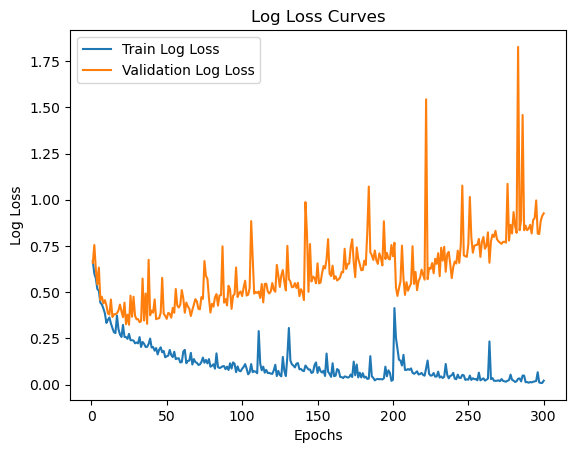

In [74]:
y_pred=model.predict(X_test)
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Plot Log Loss curves
train_log_loss = history.history['loss']
val_log_loss = history.history['val_loss']

plt.figure()
plt.plot(range(1, 300 + 1), train_log_loss, label='Train Log Loss')
plt.plot(range(1, 300 + 1), val_log_loss, label='Validation Log Loss')
plt.title('Log Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

In [75]:
from sklearn.metrics import classification_report

y_pred_probabilities = model.predict(augmented_X)
y_pred = np.argmax(y_pred_probabilities, axis=1)

target_names = [str(i) for i in range(num_classes)]  # Replace with your actual class names or labels

report = classification_report(augmented_y, y_pred, target_names=target_names)

print("Classification Report:\n", report)

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      1965
           1       0.94      0.98      0.96      2382

    accuracy                           0.95      4347
   macro avg       0.96      0.95      0.95      4347
weighted avg       0.95      0.95      0.95      4347

